In [1]:
from agents import Producer, Consumer, Influencer
from content_market import ContentMarket
import numpy as np
from test import test

In [2]:
topics = np.array([[1, 10]])

In [3]:
from util import exponential_decay, inverse_decay, tanh_decay
import matplotlib.pyplot as plt
import visualize

In [4]:
varied_param = 'producer_topic_func'
varied_param_legend_label = 'Producer Topic Function Shallowness'
varied_param_x_label = 'Producer Topic Function Shallowness'

In [5]:
num_producers = 6
num_influencers = 1
num_consumers = 5

In [6]:
function_mults = list(np.linspace(0.1, 20, 30))
functions = []
def get_fun(mult):
    return lambda x: inverse_decay(x, mult, 2)
for function_mult in function_mults:
    functions.append(get_fun(function_mult))

In [7]:
stats, markets, tests = test(
    topics=topics,
    varied_param=varied_param,
    num_producers=num_producers,
    num_consumers=num_consumers,
    num_influencers=num_influencers,
    producer_topic_func=functions,
    consumer_topic_func=lambda x: inverse_decay(x, 15, 2),
    consumer_attention_bound=10,
    consumer_external_interest_prob=0.5,
    consumer_delay_sensitivity=1,
    influencer_attention_bound=20,
    influencer_delay_sensitivity=1,
    init_following_rates_method='equal',
    init_interest_method='even',
    production_rate=1,
    external_production_rate=1,
    producer_type=Producer,
    consumer_type=Consumer,
    influencer_type=Influencer,
)

Optimizing consumer 7
Optimizing consumer 8
Optimizing consumer 9
Optimizing consumer 10
Optimizing consumer 11


Optimizing influencer 6
Optimizing producer 0
Optimizing producer 1
Optimizing producer 2
Optimizing producer 3
Optimizing producer 4
Optimizing producer 5
Iteration 0 / 100 done.
Total Social Welfare: 45.478792011393686
Optimizing consumer 7
Optimizing consumer 8
Optimizing consumer 9
Optimizing consumer 10
Optimizing consumer 11
Optimizing influencer 6
Optimizing producer 0
Optimizing producer 1
Optimizing producer 2
Optimizing producer 3
Optimizing producer 4
Optimizing producer 5
Iteration 1 / 100 done.
Total Social Welfare: 45.49363618135253
Consumer rate change: 0.004831967009075313
Consumer utility change: 0.002273715468960713
Influencer rate change: 0.0006403607509749901
Influencer utility change: 0.003122817695816238
Producer topic change: 6.171762894080501e-07
Producer utility change: 5.87958197062477e-05
Optimizing consumer 7
Optimizing consumer 8
Optimizing consumer 9
Optimizing consumer 10
Optimizing consumer 11
Optimizing influencer 6
Optimizing producer 0
Optimizing prod

In [8]:
print(stats)

{'total_social_welfare': [[0, 45.478792011393686, 45.49363618135253, 45.49363630300557], [0, 45.49218036165553, 45.532525306663665, 45.53251275976046], [0, 45.505091499634474, 45.57026775454127, 45.57029901926064, 45.57029902392088], [0, 45.51754926859912, 45.60690060584534, 45.60695452579177, 45.60695456906307], [0, 45.52957633883415, 45.642460185759276, 45.64256097456057, 45.6425613932615], [0, 45.54119420363293, 45.67700494907233, 45.677149531512526, 45.67715086198073], [0, 45.5524231948314, 45.710562547842045, 45.71076333484051, 45.71076411953108], [0, 45.56328251255671, 45.74317372444421, 45.74342883648907, 45.74342921618062], [0, 45.573790264925265, 45.774879306488074, 45.775244922419574, 45.77524552028194], [0, 45.58396351433313, 45.805720559393514, 45.8061735607819, 45.8061749579735], [0, 45.593818327742355, 45.83573061058165, 45.836279388918854, 45.836281509825824], [0, 45.60336982898677, 45.86493904083507, 45.86559837646255, 45.8656012588784], [0, 45.61263225162142, 45.893377

In [9]:
print(tests)

{'producer_topic_func': [<function get_fun.<locals>.<lambda> at 0x12fc9f6d0>, <function get_fun.<locals>.<lambda> at 0x12fc9f760>, <function get_fun.<locals>.<lambda> at 0x12fc9f7f0>, <function get_fun.<locals>.<lambda> at 0x12fc9f880>, <function get_fun.<locals>.<lambda> at 0x12fc9f910>, <function get_fun.<locals>.<lambda> at 0x12fc9f9a0>, <function get_fun.<locals>.<lambda> at 0x12fc9fa30>, <function get_fun.<locals>.<lambda> at 0x12fc9fac0>, <function get_fun.<locals>.<lambda> at 0x12fc9fb50>, <function get_fun.<locals>.<lambda> at 0x12fc9fbe0>, <function get_fun.<locals>.<lambda> at 0x12fc9fc70>, <function get_fun.<locals>.<lambda> at 0x12fc9fd00>, <function get_fun.<locals>.<lambda> at 0x12fc9fd90>, <function get_fun.<locals>.<lambda> at 0x12fc9fe20>, <function get_fun.<locals>.<lambda> at 0x12fc9feb0>, <function get_fun.<locals>.<lambda> at 0x12fc9ff40>, <function get_fun.<locals>.<lambda> at 0x12fcb4040>, <function get_fun.<locals>.<lambda> at 0x12fcb40d0>, <function get_fun.<lo

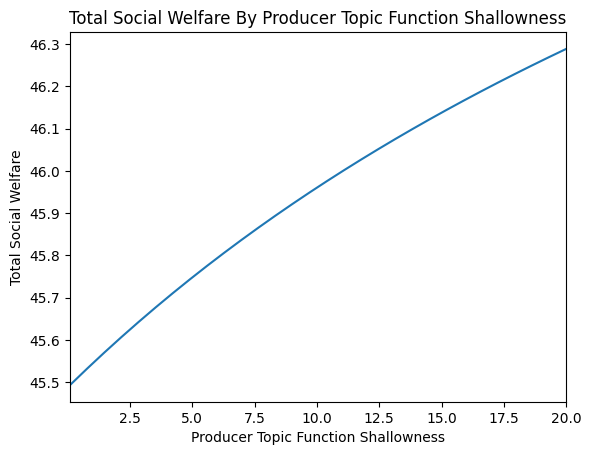

In [10]:
visualize.plot_ending_value_by_test(f"Total Social Welfare By {varied_param_x_label}", stats['total_social_welfare'], function_mults, varied_param_x_label, 'Total Social Welfare')

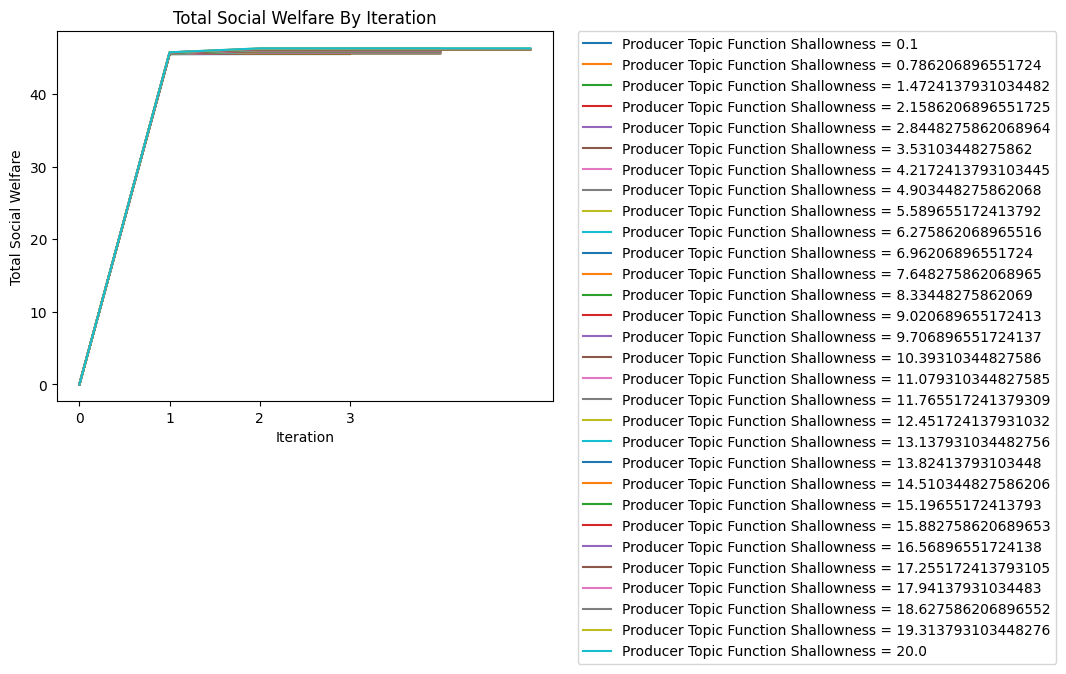

In [11]:
visualize.plot_value_by_iteration_by_test("Total Social Welfare By Iteration", stats['total_social_welfare'], function_mults, varied_param_legend_label, 'Total Social Welfare')

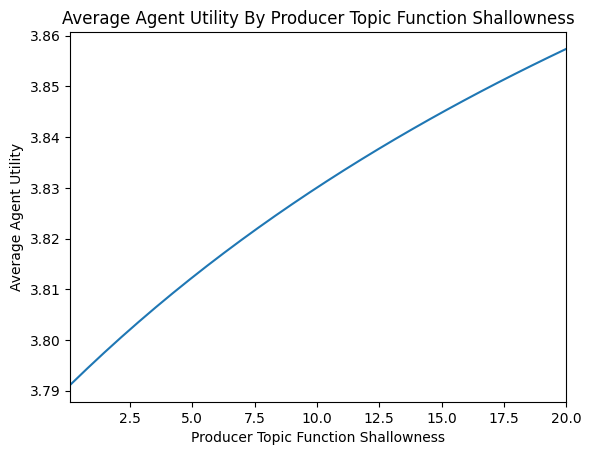

In [12]:
visualize.plot_ending_value_by_test(f"Average Agent Utility By {varied_param_x_label}", stats['average_agent_utilities'], function_mults, varied_param_x_label, 'Average Agent Utility')

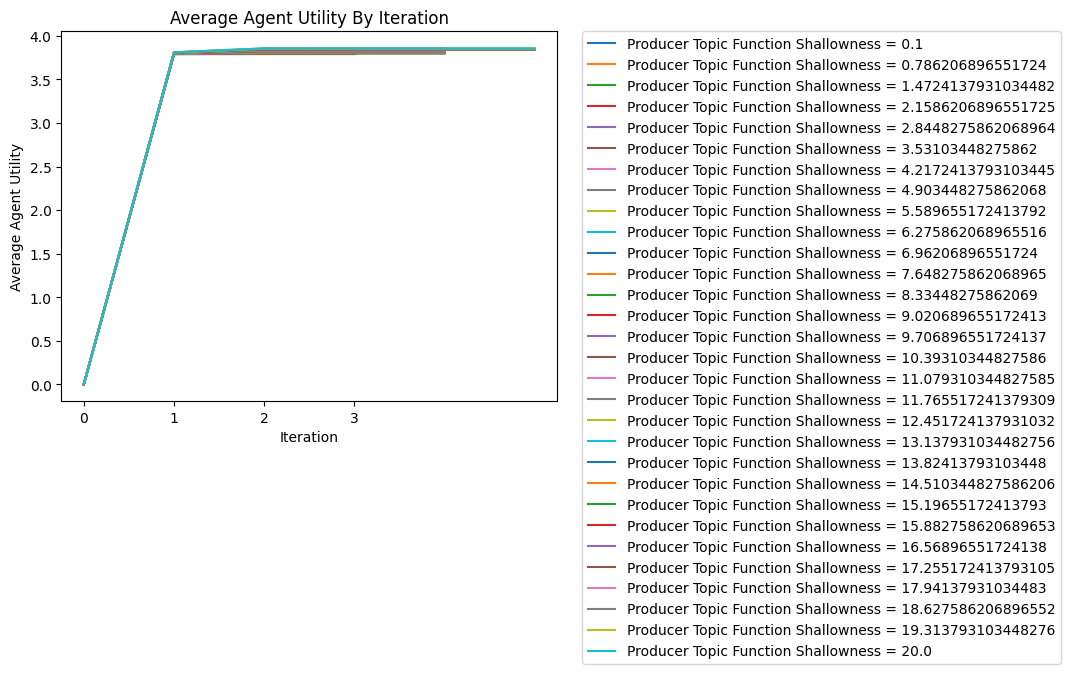

In [13]:
visualize.plot_value_by_iteration_by_test("Average Agent Utility By Iteration", stats['average_agent_utilities'], function_mults, varied_param_legend_label, 'Average Agent Utility')

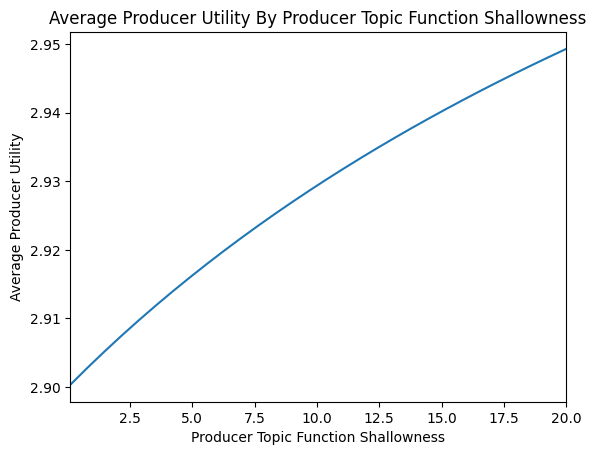

In [14]:
visualize.plot_ending_value_by_test(f"Average Producer Utility By {varied_param_x_label}", stats['average_producer_utilities'], function_mults, varied_param_x_label, 'Average Producer Utility')

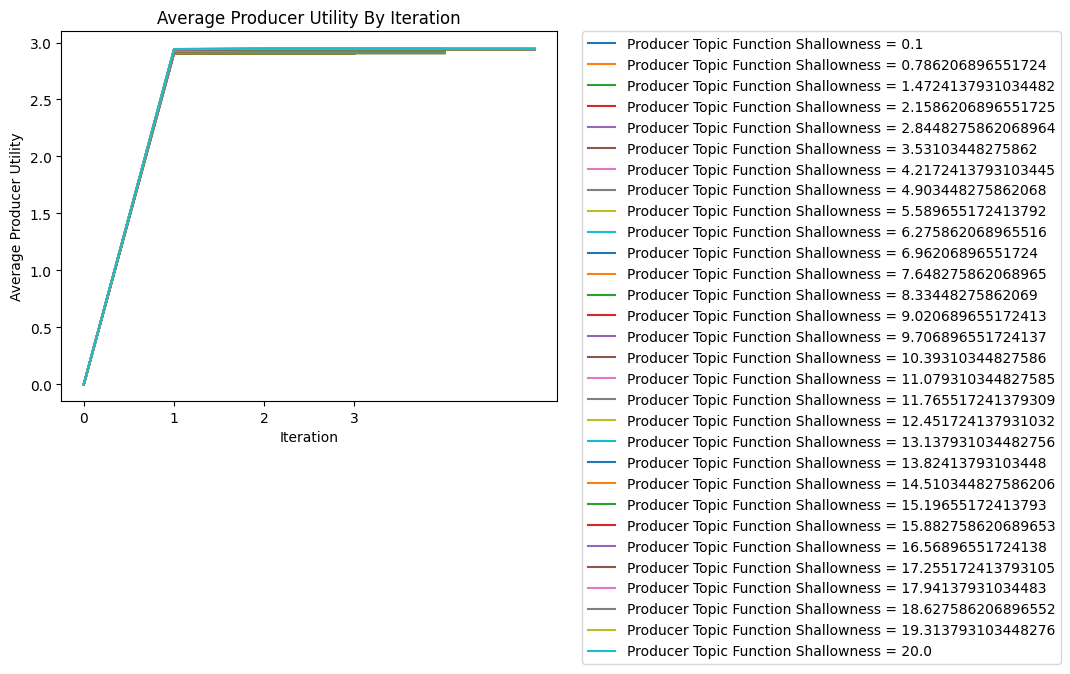

In [15]:
visualize.plot_value_by_iteration_by_test("Average Producer Utility By Iteration", stats['average_producer_utilities'], function_mults, varied_param_legend_label, 'Average Producer Utility')

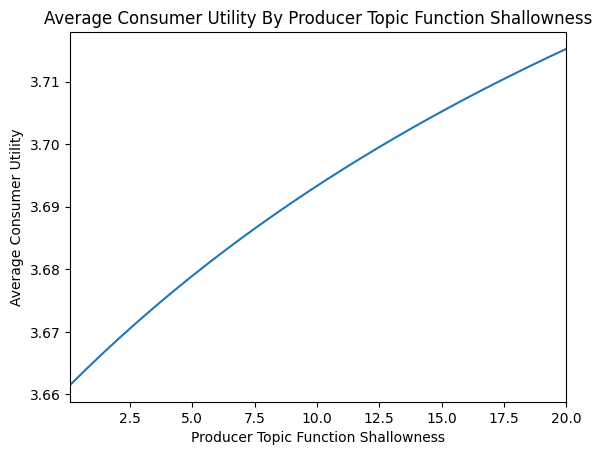

In [16]:
visualize.plot_ending_value_by_test(f"Average Consumer Utility By {varied_param_x_label}", stats['average_consumer_utilities'], function_mults, varied_param_x_label, 'Average Consumer Utility')

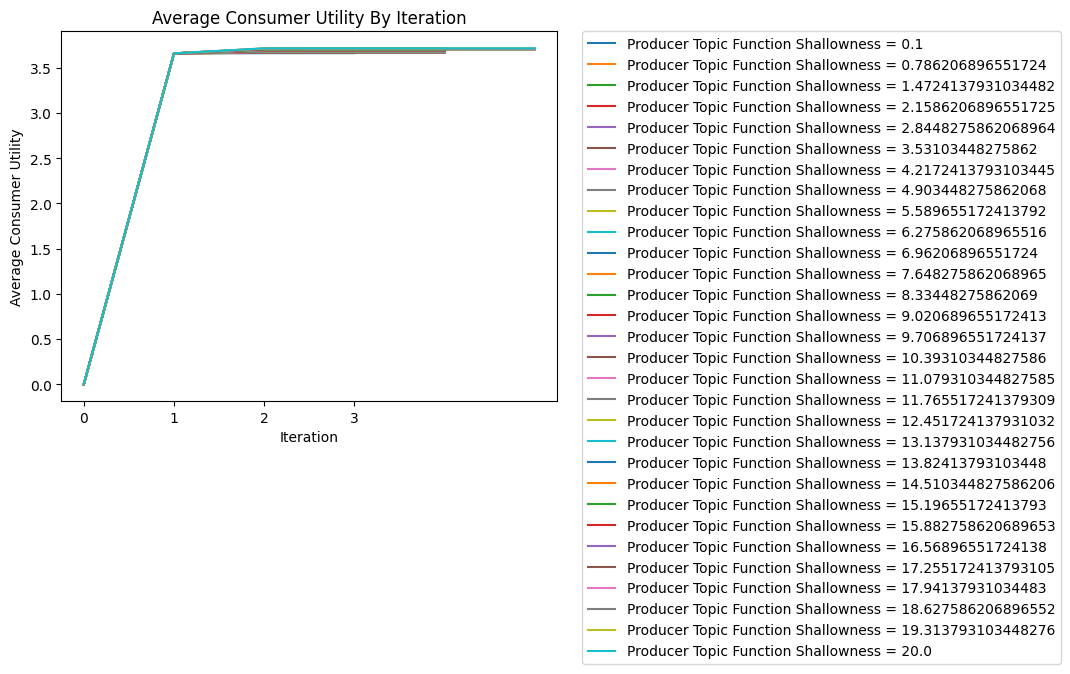

In [17]:
visualize.plot_value_by_iteration_by_test("Average Consumer Utility By Iteration", stats['average_consumer_utilities'], function_mults, varied_param_legend_label, 'Average Consumer Utility')

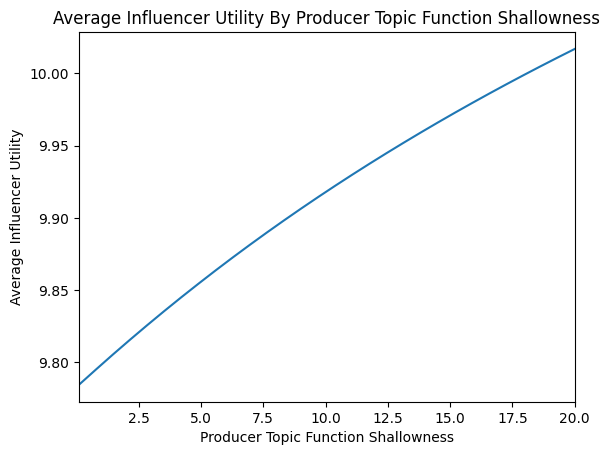

In [18]:
visualize.plot_ending_value_by_test(f"Average Influencer Utility By {varied_param_x_label}", stats['average_influencer_utilities'], function_mults, varied_param_x_label, 'Average Influencer Utility')

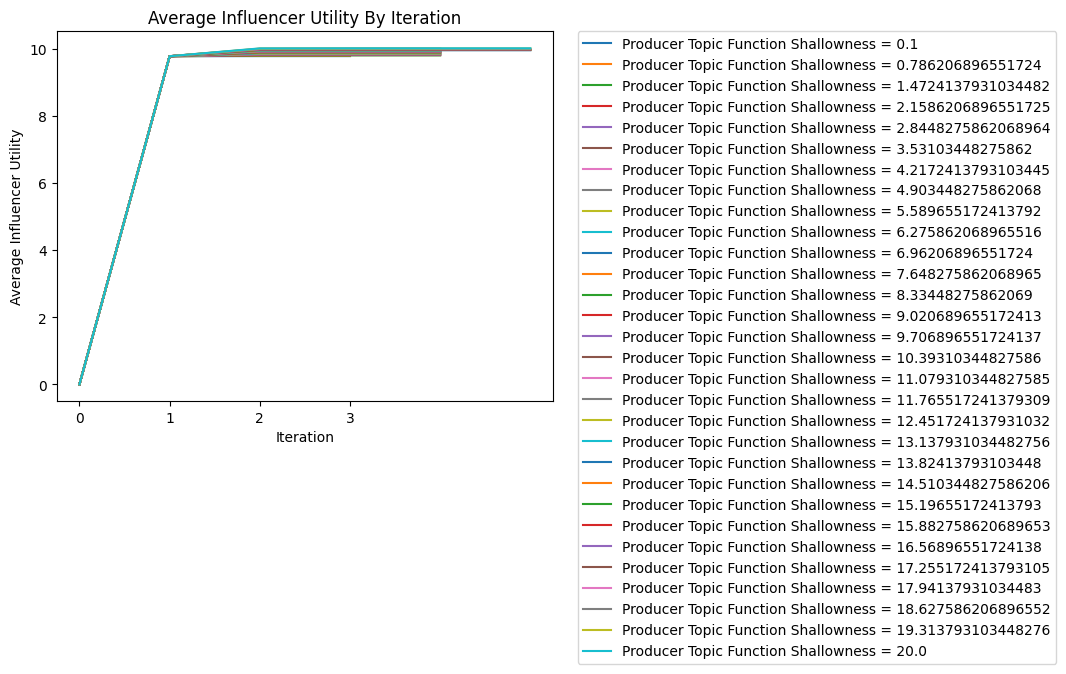

In [19]:
visualize.plot_value_by_iteration_by_test("Average Influencer Utility By Iteration", stats['average_influencer_utilities'], function_mults, varied_param_legend_label, 'Average Influencer Utility')

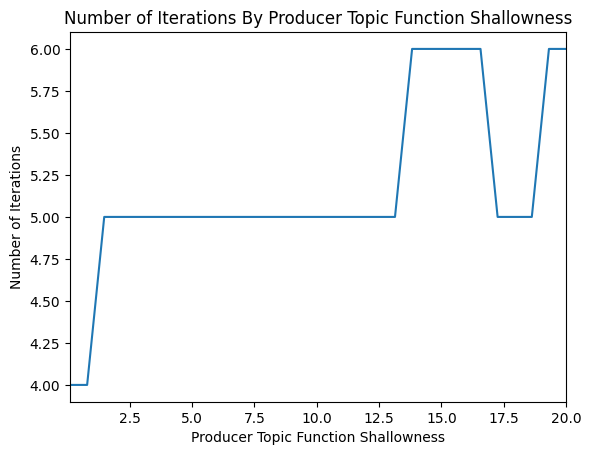

In [20]:
visualize.plot_ending_value_by_test(f"Number of Iterations By {varied_param_x_label}", stats['num_iterations'], function_mults, varied_param_x_label, 'Number of Iterations')